In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 데이터 로드
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 정규화 (0~1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# DNN 모델 구성
model_dnn = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

# 컴파일
model_dnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# 학습
history_dnn = model_dnn.fit(x_train, y_train, epochs=10,
                            validation_split=0.1, batch_size=128, verbose=2)

# 평가
test_loss, test_acc = model_dnn.evaluate(x_test, y_test, verbose=2)
print(f"DNN Test Accuracy: {test_acc:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
422/422 - 4s - 9ms/step - accuracy: 0.7753 - loss: 0.6324 - val_accuracy: 0.8473 - val_loss: 0.4132
Epoch 2/10
422/422 - 3s - 6ms/step - accuracy: 0.8416 - loss: 0.4387 - val_accuracy: 0.8682 - val_loss: 0.3702
Epoch 3/10
422/422 - 3s - 6ms/step - accuracy: 0.8556 - loss: 0.3995 - val_accuracy: 0.8698 - val_loss: 0.3558
Epoch 4/10
422/422 - 4s - 9ms/step - accuracy: 0.8650 - loss: 0.3744 - val_accuracy: 0.8720 - val_loss: 0.3375
Epoch 5/10
422/422 - 3s - 7ms/step - accuracy: 0.8690 - loss: 0.3585 - val_accuracy: 0.8780 - val_loss: 0.3324
Epoch 6/10
422/422 - 2s - 6ms/step - accuracy: 0.8747 - loss: 0.3443 - val_accuracy: 0.8783 - val_loss: 0.3336
Epoch 7/10
422/422 - 3s - 6ms/step - accuracy: 0.8787 - loss: 0.3326 - val_accuracy: 0.8833 - val_loss: 0.3220
Epoch 8/10
422/422 - 3s - 7ms/step - accuracy: 0.8814 - loss: 0.3238 - val_accuracy: 0.8835 - val_loss: 0.3175
Epoch 9/10
422/422 - 3s - 7ms/step - accuracy: 0.8841 - loss: 0.3160 - val_accuracy: 0.8855 - val_loss: 0.3201
E

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
train_dataset = torchvision.datasets.FashionMNIST("/content/drive/MyDrive/2025-2 MLP/source/chap05/data", download=True, transform=transforms.Compose([transforms.ToTensor()]))
test_dataset = torchvision.datasets.FashionMNIST("/content/drive/MyDrive/2025-2 MLP/source/chap05/data", download=True, train=False, transform=transforms.Compose([transforms.ToTensor()]))

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.5MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 214kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.91MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 35.8MB/s]


In [6]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100)

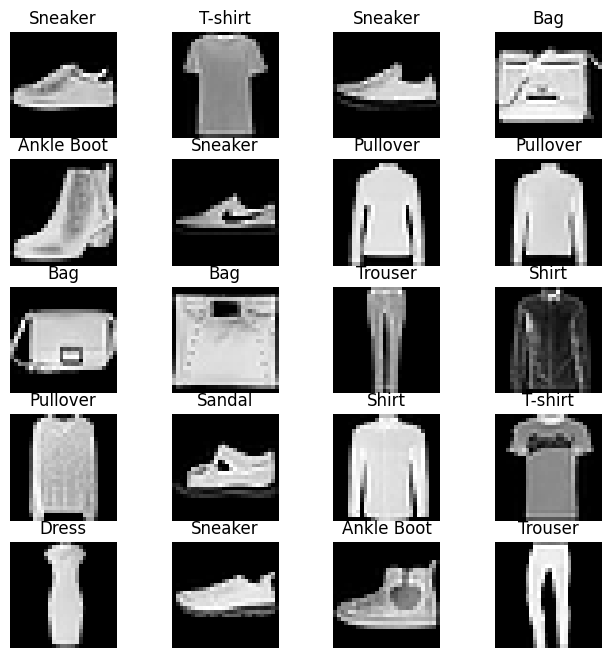

In [7]:
labels_map = {0: 'T-shirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'}

fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows + 1):
  img_xy = np.random.randint(len(train_dataset))
  img = train_dataset[img_xy][0][0,:,:]
  fig.add_subplot(rows, columns, i)
  plt.title(labels_map[train_dataset[img_xy][1]])
  plt.axis('off')
  plt.imshow(img, cmap='gray')
plt.show()

In [8]:
class FashionDNN(nn.Module):
  def __init__(self):
    super(FashionDNN, self).__init__()
    self.fc1 = nn.Linear(in_features=784, out_features=256)
    self.drop = nn.Dropout(0.25)
    self.fc2 = nn.Linear(in_features=256, out_features=128)
    self.fc3 = nn.Linear(in_features=128, out_features=10)
  def forward(self, input_data):
    out = input_data.view(-1, 784)
    out = F.relu(self.fc1(out))
    out = self.drop(out)
    out = F.relu(self.fc2(out))
    out = self.fc3(out)
    return out

In [10]:
learning_rate = 0.001
model = FashionDNN()
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

FashionDNN(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (drop): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [11]:
num_epochs = 5
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

for epochs in range(num_epochs):
  for images, labels in train_loader:
    images, labels = images.to(device), labels.to(device)

    train = Variable(images.view(100, 1, 28, 28))
    labels = Variable(labels)

    outputs = model(train)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    count += 1

    if not (count%50):
      total = 0
      correct = 0
      for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        labels_list.append(labels)
        test = Variable(images.view(100, 1, 28, 28))
        outputs = model(test)
        predictions = torch.max(outputs, 1)[1].to(device)
        predictions_list.append(predictions)
        correct += (predictions == labels).sum()
        total += len(labels)

      accuracy = correct*100/total
      loss_list.append(loss.data)
      iteration_list.append(count)
      accuracy_list.append(accuracy)

    if not (count%500):
      print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))

Iteration: 500, Loss: 0.5732226371765137, Accuracy: 83.5%
Iteration: 1000, Loss: 0.41550010442733765, Accuracy: 84.90999603271484%
Iteration: 1500, Loss: 0.3820124864578247, Accuracy: 84.25999450683594%
Iteration: 2000, Loss: 0.335807204246521, Accuracy: 85.41999816894531%
Iteration: 2500, Loss: 0.267727255821228, Accuracy: 85.86000061035156%
Iteration: 3000, Loss: 0.2802159786224365, Accuracy: 86.18999481201172%


In [12]:
# PyTorch 모델 최종 평가
model.eval() # 모델을 평가 모드로 설정
with torch.no_grad(): # 평가 시에는 gradient 계산 비활성화
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('PyTorch Model Test Accuracy: {} %'.format(100 * correct / total))

PyTorch Model Test Accuracy: 87.12 %
